In [0]:
import pandas as pd
from fbprophet import Prophet 
from google.colab import files

## STEP 1: Get the Data

In [0]:
og_df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/Zip_Zhvi_SingleFamilyResidence.csv', encoding='latin')

In [0]:
# ----- USE CALIFORNIA AS AN EXAMPLE BC CALIFORNIA IS BEST STATE DUH
# CA = og_df[og_df['State'] == 'CA']
# ca_df = pd.DataFrame(CA.describe())
# ca_df

# STEP 2: Prep the data for Visualizations

### Find NAs

In [0]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = og_df.copy()
df.isna().sum()

## 2.1 -- Group by State

In [0]:
df = og_df.copy()
zips_per_state = []
for state in set(df['State']):
  state_df = df[df['State'] == state]
  state_df_desc = pd.DataFrame(state_df.describe())
  metro = len(set(state_df['Metro']))

  avg_price_97 = state_df_desc['1997-01']['mean']
  max_price_97 = state_df_desc['1997-01']['max']
  min_price_97 = state_df_desc['1997-01']['max']
  std_price_97 = state_df_desc['1997-01']['std']

  avg_price_19 = state_df_desc['2019-12']['mean']
  max_price_19 = state_df_desc['2019-12']['max']
  min_price_19 = state_df_desc['2019-12']['max']
  std_price_19 = state_df_desc['2019-12']['std']

  zips_per_state.append({ "state": state, 
                         "zips": len(state_df), 
                         "metros": metro,
                         "avg_price_97": avg_price_97,
                         "max_price_97": max_price_97,
                         "min_price_97": min_price_97,
                         "std_price_97": std_price_97,
                         "avg_price_19": avg_price_19,
                         "max_price_19": max_price_19,
                         "min_price_19": min_price_19,
                         "std_price_19": std_price_19
                         })
  # print(state, len(state_df), metro)

# ----- UNCOMMENT TO SAVE TO FILE
# zps = pd.DataFrame(zips_per_state)
# zps.to_csv('zips_per_state.csv')
# files.download('zips_per_state.csv')

## 2.1 -- Group by Metro

In [0]:
df = og_df.copy()
zips_per_metro = []
for metro in set(df['Metro']):
  metro_df = df[df['Metro'] == metro]
  metro_df_desc = pd.DataFrame(metro_df.describe())
  # metro = len(set(metro_df['Metro']))

  avg_price_97 = metro_df_desc['1997-01']['mean']
  max_price_97 = metro_df_desc['1997-01']['max']
  min_price_97 = metro_df_desc['1997-01']['max']
  std_price_97 = metro_df_desc['1997-01']['std']

  avg_price_19 = metro_df_desc['2019-12']['mean']
  max_price_19 = metro_df_desc['2019-12']['max']
  min_price_19 = metro_df_desc['2019-12']['max']
  std_price_19 = metro_df_desc['2019-12']['std']

  zips_per_metro.append({ "metro": metro, 
                         "zips": len(metro_df), 
                        #  "metros": metro,
                         "avg_price_97": avg_price_97,
                         "max_price_97": max_price_97,
                         "min_price_97": min_price_97,
                         "std_price_97": std_price_97,
                         "avg_price_19": avg_price_19,
                         "max_price_19": max_price_19,
                         "min_price_19": min_price_19,
                         "std_price_19": std_price_19
                         })
# ----- UNCOMMENT TO SAVE TO FILE
# zps = pd.DataFrame(zips_per_metro)
# zps.to_csv('zips_per_metro.csv')
# files.download('zips_per_metro.csv')

In [0]:
# 

# STEP 3: Run Prophet on ONE zip code

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


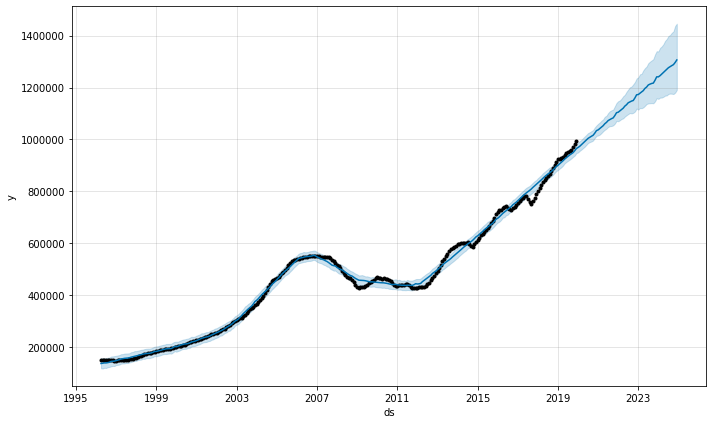

In [0]:
df = og_df.copy()
ds = df.columns[7:]
region_row = df[df['RegionName'] == 90039]
r_df = pd.DataFrame({ 'y': region_row.loc[:, "1996-04"::].values[0], 'ds': ds })
m = Prophet()
m.fit(r_df)
future = m.make_future_dataframe(periods=60, freq='M')
forecast = m.predict(future)
fig1 = m.plot(forecast)

# STEP 4: Run Prophet on ALL 30k Zip Codes
Process run in separate file. Results exported, saved to github and imported below --

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_1000.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_2000.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_4000.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_6000.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_8000.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_13000a.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_13000b.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_15000.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_17000.csv')
df10 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_19000.csv')
df11 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_21000.csv')
df12 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_22000.csv')
df13 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_24000.csv')
df14 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_26000.csv')
df15 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_28000.csv')
df16 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_30000.csv')
df17 = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/bigger_df_-1.csv')

In [0]:
# combine the data
df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], axis=1)
df = df_all.copy()
df = df.loc[:,~df.columns.duplicated()]

In [0]:
# confirm we have the correct number of zip codes
len(df.T)

30433

In [0]:
# shoot, looks like we're one short. Let's compare with our original list of zips
# oh well, we can just run these manually
og_RegionNames = list(og_df['RegionName'].values)
og_RegionNames_str = [str(region) for region in og_RegionNames]
df_RegionNames = list(df.columns)
diff = list(set(og_RegionNames_str) - set(df_RegionNames))
diff

['99901', '42464']

In [0]:
# also, looks like our column names don't actually look like the zip codes they are representing
new_cols = []
for column in df.columns:
  if len(column) == 3:
    new_cols.append('00'+ str(column)) 
  elif len(column) == 4:
    new_cols.append('0'+ str(column))
  else:
    new_cols.append(str(column))
df.columns = new_cols

In [0]:
# and we didn't import our date column
df['Unnamed: 0'] = forecast['ds']
cols = df.columns.values
cols[0] = 'forecast'
df.columns = cols

In [0]:
df_t = df.T

In [0]:
df_t.to_csv('30k_zips_with_prophet.csv')

In [0]:
files.download('30k_zips_with_prophet.csv')

In [0]:
df_t_a = df_t[df_t.columns[0:150]]
df_t_b = df_t[df_t.columns[150:]]

In [0]:
df_t_a.to_csv('30k_zips_with_prophet_A.csv')
df_t_b.to_csv('30k_zips_with_prophet_B.csv')

In [0]:
files.download('30k_zips_with_prophet_A.csv')
files.download('30k_zips_with_prophet_B.csv')

In [0]:
zips = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/DMA-zip.csv')

In [0]:
zips

,FIPS,COUNTY,ST,DMA CODE,DMA NAME,ZIPCODE
0,1001,Autauga,AL,698,MONTGOMERY,36003
1,1001,Autauga,AL,698,MONTGOMERY,36006
2,1001,Autauga,AL,698,MONTGOMERY,36008
3,1001,Autauga,AL,698,MONTGOMERY,36051
4,1001,Autauga,AL,698,MONTGOMERY,36066
...,...,...,...,...,...,...
41530,56043,Washakie,WY,767,CASPER-RIVERTON,82442
41531,56045,Weston,WY,764,RAPID CITY,82701
41532,56045,Weston,WY,764,RAPID CITY,82715
41533,56045,Weston,WY,764,RAPID CITY,82723


In [0]:
df

,Unnamed: 0,501,544,601,602,603,604,605,606,610,611,612,613,617,622,624,693,703,705,715,718,727,728,730,733,734,737,742,765,772,775,791,794,802,803,820,821,822,830,840,...,99550,99556,99567,99568,99572,99574,99577,99587,99603,99605,99610,99611,99615,99623,99631,99635,99639,99645,99652,99654,99663,99664,99669,99672,99674,99676,99683,99686,99688,99701,99705,99709,99712,99714,99762,99801,99824,99827,99833,99835
0,0,143407.576125,63290.168797,29111.920044,76054.548280,76584.044961,64260.067239,117540.716669,56384.671533,30109.599521,47646.826957,2323.746659,-84764.945230,-59575.940042,-276743.761469,-4269.454266,181164.685634,-58120.323291,157240.959814,49810.819278,628171.750285,-9793.501644,49758.540520,46140.756171,-218788.562875,4.895891e+05,318382.512567,379710.812622,271366.715800,-113256.375013,62435.164498,-144985.485673,3219.763814,-83699.261067,-172715.957731,140262.015973,267004.107460,66901.608342,-57517.282136,-828685.314572,...,197057.389618,71378.555494,176298.325769,71594.624916,66707.670353,335827.294210,191934.183996,260529.149377,93311.504894,64308.588473,83641.843400,91357.844521,163075.498358,93381.746129,88019.436974,191369.999565,93340.197460,139208.544095,115002.818661,133529.647247,60509.065153,119018.593867,95829.515582,104700.402447,117609.571311,73018.426565,78336.037481,-19188.027979,101263.483083,111665.409386,131363.930127,125131.404021,129805.379099,73630.816534,1.512837e+06,176652.357388,209501.596211,300557.074951,303307.834218,151600.958560
1,1,143125.182109,63260.943603,29995.868481,75995.979989,76290.088877,64143.546612,117614.624528,56522.036816,30050.326430,47643.747092,2328.332320,-83964.689126,-58509.277979,-275290.103691,-3086.354613,180828.750494,-57183.147929,157239.169684,50115.692292,625955.040335,-9673.099334,49997.610709,46262.589486,-217812.111338,4.885431e+05,317801.872080,381700.362043,271723.293891,-112302.531032,62692.701059,-144198.357287,3689.146513,-82452.906740,-170507.956206,140610.237158,266774.071416,68090.824063,-55383.871672,-823294.198486,...,196452.728345,71620.185925,176870.754081,71813.540967,68357.872410,335895.963854,192310.855948,260535.817380,93671.441757,64687.493445,83726.377937,91462.735592,163550.815699,93805.753847,87946.246515,190956.302842,93108.066096,139996.182678,115545.474815,134323.665660,60749.265458,119022.398297,95949.402557,104720.843734,118078.332857,73024.595991,79251.089876,-18050.163067,101190.381022,111721.800470,131291.104008,125246.082528,129716.834758,73481.551862,1.507610e+06,177270.298510,209456.875948,299634.307652,303412.478613,152265.191991
2,2,142729.257001,63480.365321,30855.959015,75995.312916,75965.931743,63890.502130,117608.896462,56617.605976,30210.940041,47646.801430,2469.386577,-82747.387891,-57740.131224,-266918.228242,-2158.107957,180717.927722,-57095.795872,157249.178704,50141.625433,623492.331120,-9566.989508,50016.307005,46707.903916,-216354.897061,4.886214e+05,316982.001421,384857.482239,271130.136862,-112029.928442,62699.348399,-144242.329311,4192.072631,-80750.436014,-167595.266447,141198.424627,266678.452958,68824.202176,-55814.756100,-824557.046497,...,196232.819922,72120.979544,177315.196292,72543.593879,70710.788207,335002.954962,192573.924595,260957.411033,94609.560767,65700.440350,84158.282397,92002.886651,163945.926440,94378.027395,88377.763226,190641.773838,93247.704643,140747.163309,115491.670187,135053.842845,61105.143799,119391.194226,96647.210335,105125.488759,117858.286577,73156.315278,80083.350028,-16536.962861,101438.914618,112070.606888,131284.201103,125515.815460,129812.191558,73779.233605,1.498475e+06,178272.353880,209562.852381,299470.332456,303752.307085,153546.229298
3,3,142439.958760,63775.799661,31839.530691,75870.859190,75962.592514,63851.327955,117411.039378,57386.709178,30396.719523,47782.971991,2376.343387,-81470.329785,-56659.057411,-265565.113818,-1252.525327,180215.937226,-56082.883974,156924.825824,50248.833075,620032.523316,-9483.619471,50169.008519,46678.273617,-214177.269995,4.898479e

In [0]:
new_cols = []
for column in df.columns:
  if len(column) == 3:
    new_cols.append('00'+ str(column)) 
  elif len(column) == 4:
    new_cols.append('0'+ str(column))
  else:
    new_cols.append(str(column))

In [0]:
df.columns = new_cols

In [0]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', length=292)

In [0]:
forecast['ds']

0     1996-04-01
1     1996-05-01
2     1996-06-01
3     1996-07-01
4     1996-08-01
         ...    
340   2024-07-31
341   2024-08-31
342   2024-09-30
343   2024-10-31
344   2024-11-30
Name: ds, Length: 345, dtype: datetime64[ns]

In [1]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%ls

drive/  sample_data/


In [6]:
path = "/content/drive/My Drive/data/30k_zips_with_prophet.csv"
df_bonus = pd.read_csv(path)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [7]:
df_bonus.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344
0,forecast,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00,1998-07-01 00:00:00,1998-08-01 00:00:00,1998-09-01 00:00:00,1998-10-01 00:00:00,1998-11-01 00:00:00,1998-12-01 00:00:00,1999-01-01 00:00:00,1999-02-01 00:00:00,1999-03-01 00:00:00,1999-04-01 00:00:00,1999-05-01 00:00:00,1999-06-01 00:00:00,...,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00,2022-01-31 00:00:00,2022-02-28 00:00:00,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-30 00:00:00,2024-07-31 00:00:00,2024-08-31 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-30 00:00:00
1,00501,143407.57612467572,143125.18210915907,142729.25700106422,142439.95876041506,142142.21205113904,141707.9573705128,141357.72011090795,140928.40101781333,140484.92878144854,140189.8221505217,139675.2000563344,139271.8860663343,138920.93288097635,138592.83804960945,138229.38419579086,137907.4119283976,137567.23066350466,137171.5828310024,136820.7960171212,136444.84329865538,136087.70015725127,135533.75724284642,135095.30354585132,134789.59517472467,134434.14287042766,134060.04955661076,133728.96522802007,133373.66817322295,132992.13816822882,132636.15286284446,132285.33349988368,131962.75860129786,131687.60492633205,130874.97546271485,130517.05829611766,130308.85260369224,129947.14762332248,129526.80437347744,129227.97396411776,...,109038.89500881603,109422.61682996622,110015.7268954241,110692.10181210077,109863.17965539932,110528.9191270307,111294.18375675447,111659.47340520911,111831.2463898708,112384.64555564779,112622.41955822859,112843.53694657539,113412.3124424299,113797.70406496884,114443.43047320515,115184.17232456435,114099.73174394573,114862.98751665946,115723.8174354118,116075.83537608312,116200.83359439988,116785.89265442752,116987.82845101133,117173.6747709056,117786.81816107851,118174.20981406793,118872.16554292938,119672.83872340331,118334.30829456268,119199.16597737193,119971.37156573881,120357.95145781846,120623.05218785605,121112.64135684574,121420.8351453208,121716.34191539131,122198.99933267945,122581.42040950274,123121.6046025834,123729.1818081638
2,00544,63290.16879725616,63260.94360276103,63480.36532086383,63775.799661121775,64237.09906986853,64104.24279536816,63622.590989921926,63394.34602213741,63660.95034850707,64262.611530332724,64719.562058163225,64176.556382500145,64378.09732295869,64450.42869851107,64606.68034425301,64780.91078033191,65005.686255418426,64996.959979810905,64851.32124226298,64658.86933088041,64813.547915256844,65187.94667734188,65401.710145923564,65394.39925220043,65468.02014226543,65639.17736598571,65728.25617163956,65779.68592615076,65773.41276432782,65897.52043363336,66086.912466764,65922.63788783942,65958.61807035845,66105.2770783828